# Problem Statement 

A mall is conducted a survey to find out the consumer spend Analysis based on there income. Extract the spending habbit of male and female individuals.

# Understanding the Problem Statement


Business Objective:Maximize the spending of individual.

Constraints :Minimise the deadstock


# Understanding Success Criteria  for Given Problem


Business Success Criteria:Increase the spending 40%.

Economical success Criteria:Increase the revenue of mall 30%.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/Users/macbookpro/Untitled Folder/Customer Segment /Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploring the dataset

In [6]:
# Returns number of rows and columns of the dataset
df.shape

(200, 5)

In [8]:
# Returns an object with all of the column headers 
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# Returns the null values count
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
# Returns the Descriptive summary of dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Univariate Analysis

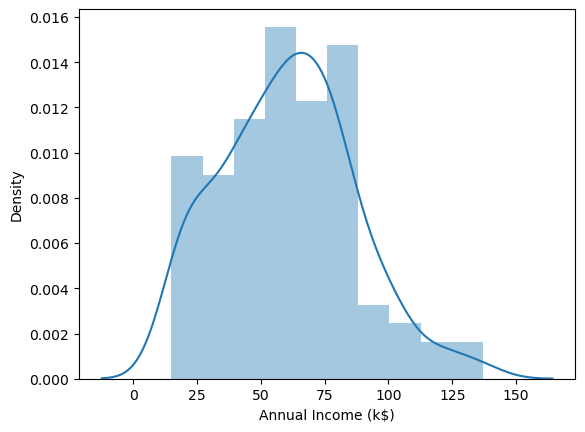

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

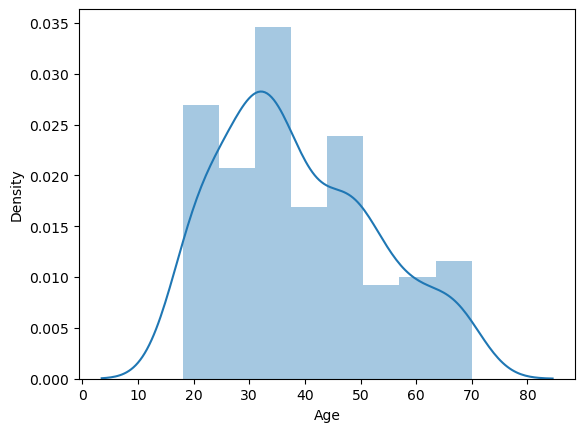

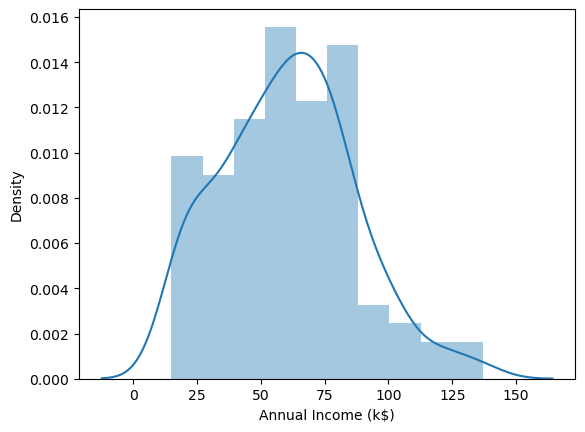

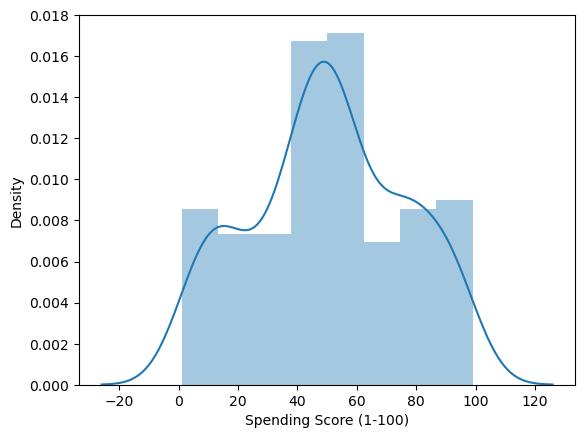

In [7]:
columns =[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    
    

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

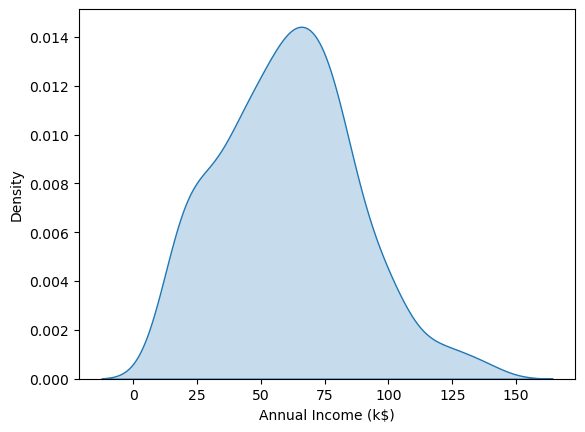

In [8]:
sns.kdeplot(df['Annual Income (k$)'],shade=True)

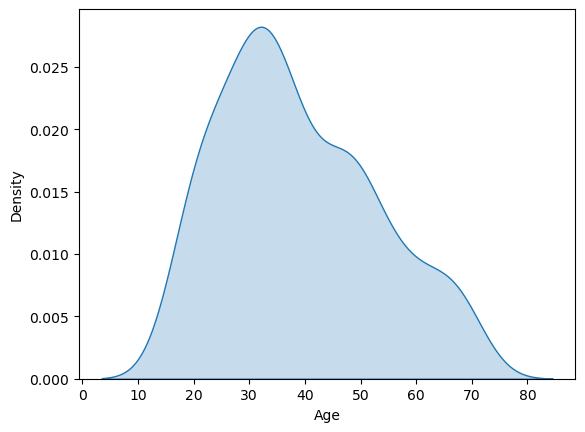

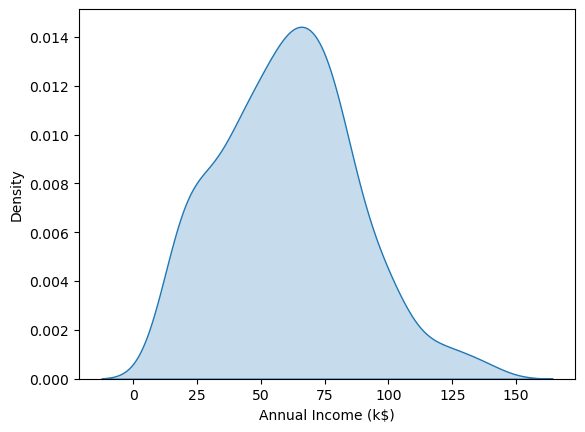

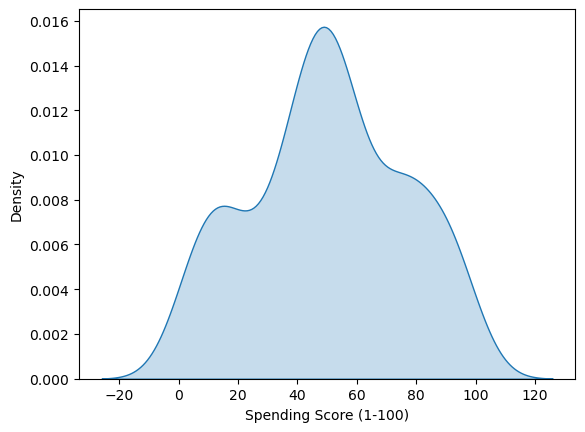

In [9]:
columns =[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True)
    

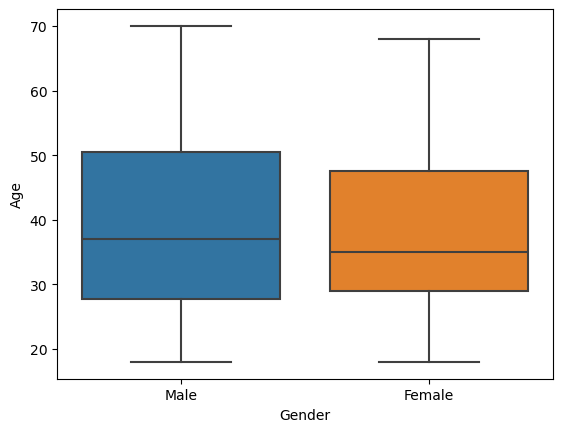

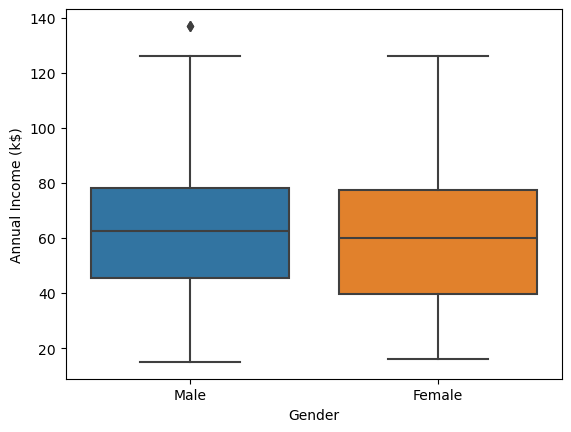

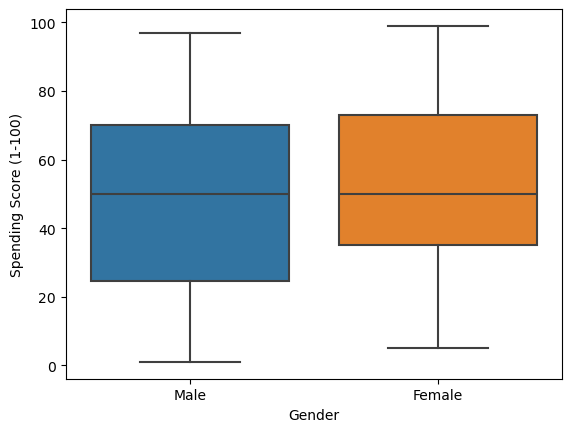

In [10]:
columns =[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)


Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

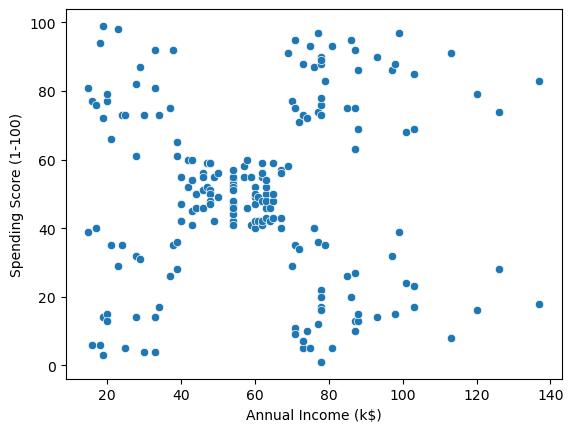

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')

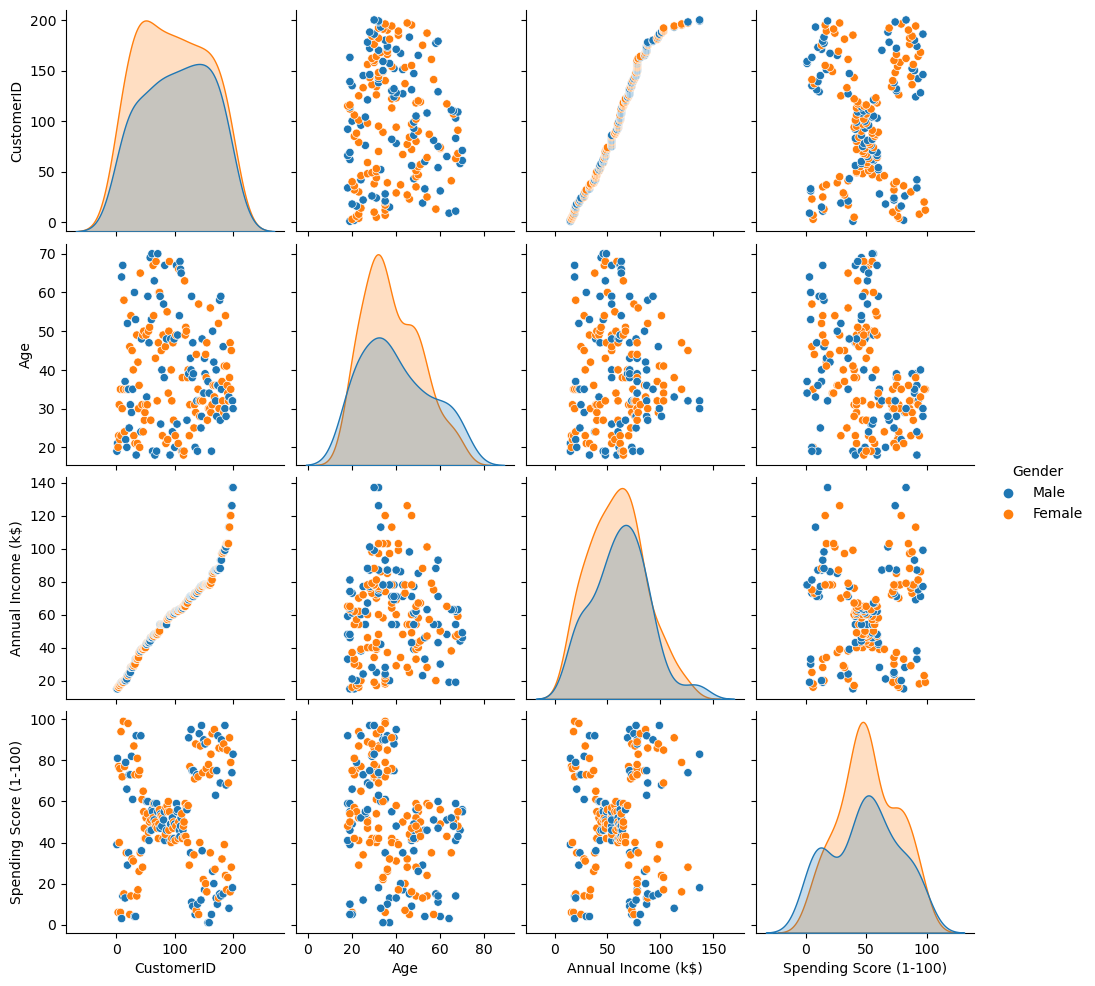

In [13]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

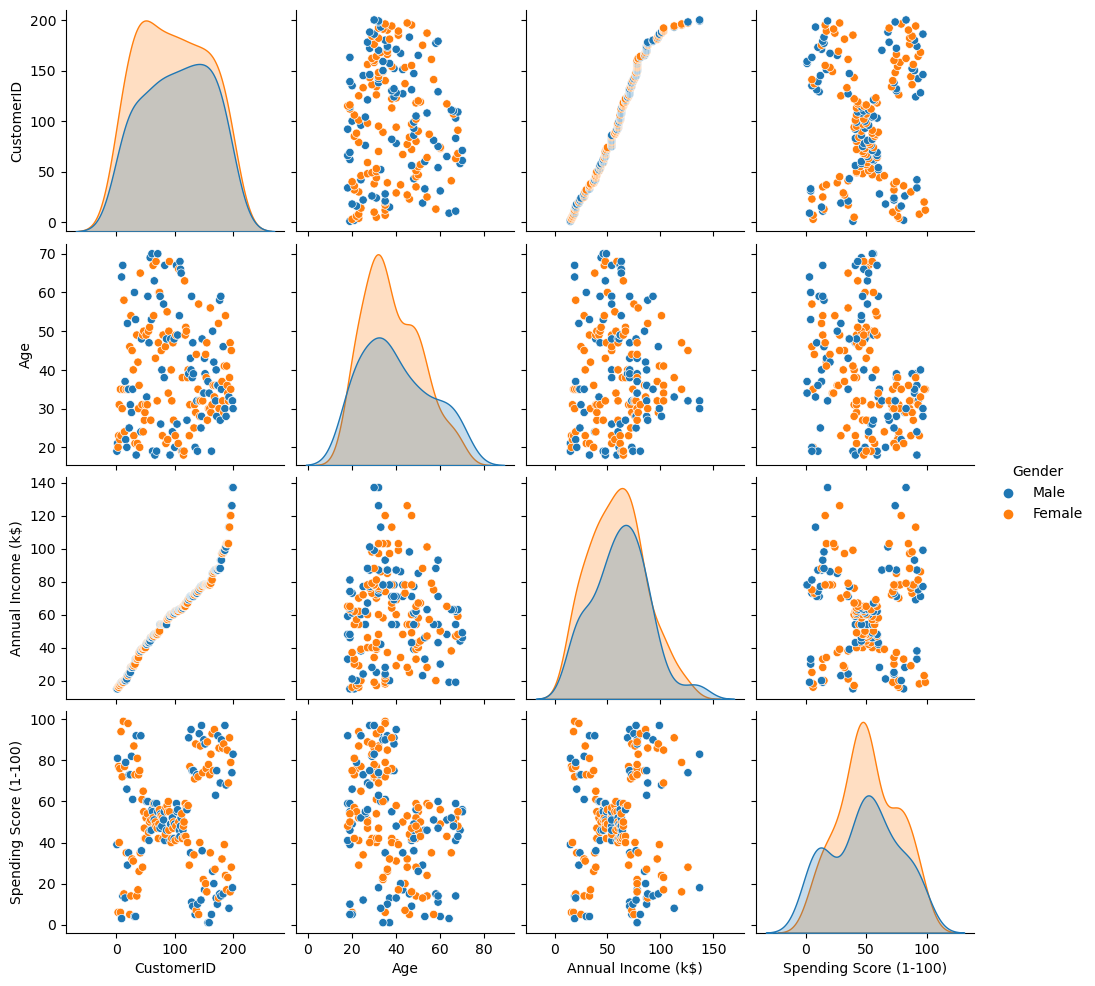

In [16]:
sns.pairplot(df,hue='Gender')

In [18]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Clustering - Univariate,Bivariate,Multivariate

In [26]:
clustering1 = KMeans(n_clusters=6)

In [27]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [28]:
clustering1.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [29]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,5
3,4,Female,23,16,77,5
4,5,Female,31,17,40,5


In [30]:
df['Income Cluster'].value_counts()

Income Cluster
3    48
0    42
2    42
5    32
1    28
4     8
Name: count, dtype: int64

In [31]:
clustering1.inertia_

5050.9047619047615

In [34]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [35]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.49619047619,
 5050.9047619047615,
 3941.4163614163613,
 2871.629365079365,
 2208.812049062049,
 1783.810606060606]

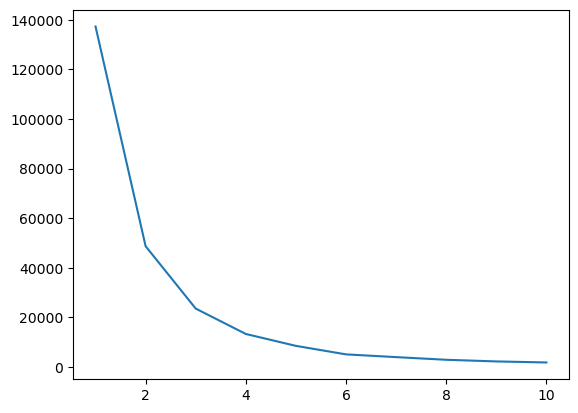

In [36]:
plt.plot(range(1,11),intertia_scores)

In [37]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [43]:
df.groupby('Income Cluster')[[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.000000,42.238095,50.666667
1,38.214286,93.000000,50.928571
2,35.428571,75.095238,51.095238
3,41.604167,60.083333,49.041667
4,36.500000,124.000000,49.625000
5,34.906250,22.000000,49.656250


# Bivariate Clustering

In [44]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,5,0
1,2,Male,21,15,81,5,4
2,3,Female,20,16,6,5,0
3,4,Female,23,16,77,5,4
4,5,Female,31,17,40,5,0


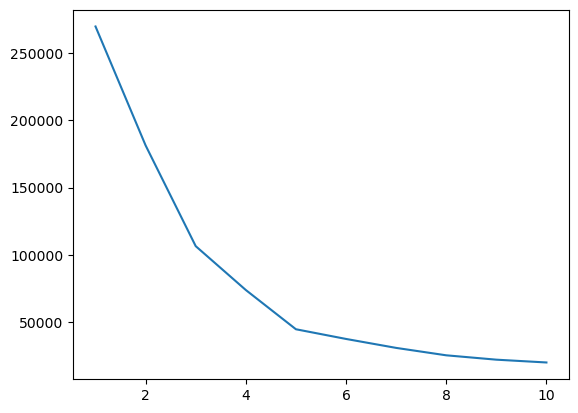

In [48]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [63]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns =['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

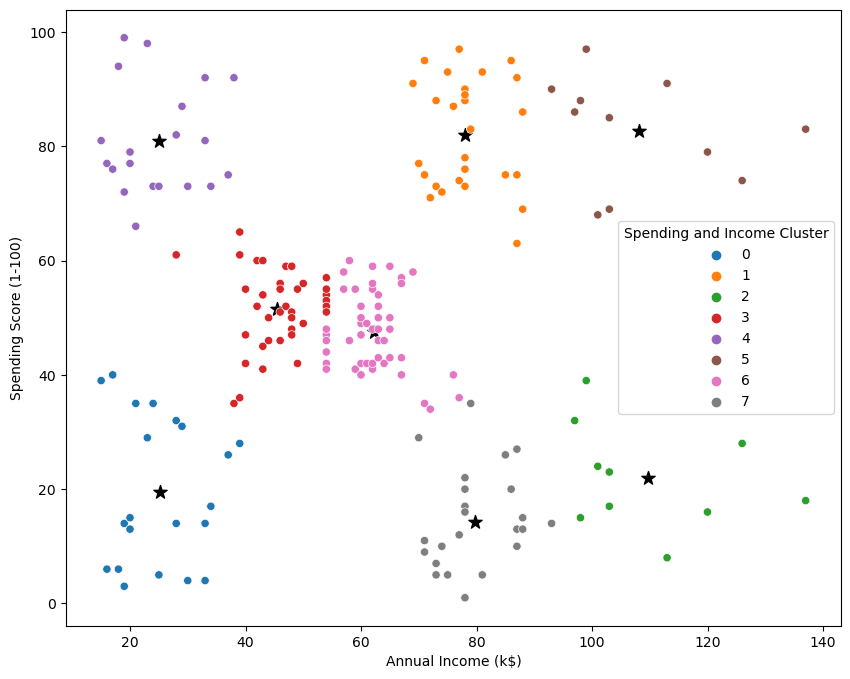

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x ='Annual Income (k$)', y ='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [69]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.619048,0.380952
1,0.535714,0.464286
2,0.700000,0.300000
3,0.589744,0.410256
4,0.600000,0.400000
5,0.545455,0.454545
6,0.574468,0.425532
7,0.375000,0.625000


In [73]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,44.142857,25.142857,19.523810
1,32.785714,78.035714,81.892857
2,41.000000,109.700000,22.000000
3,43.820513,45.512821,51.512821
4,24.850000,24.950000,81.000000
5,32.454545,108.181818,82.727273
6,41.936170,62.234043,47.553191
7,40.875000,79.708333,14.291667


# Multivariate Analysis

In [77]:
from sklearn.preprocessing import StandardScaler


In [78]:
scale = StandardScaler()

In [79]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,5,0
1,2,Male,21,15,81,5,4
2,3,Female,20,16,6,5,0
3,4,Female,23,16,77,5,4
4,5,Female,31,17,40,5,0


In [82]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,5,0,True
1,2,21,15,81,5,4,True
2,3,20,16,6,5,0,False
3,4,23,16,77,5,4,False
4,5,31,17,40,5,0,False


In [84]:
dff =dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [85]:
dff = scale.fit_transform(dff)

In [88]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


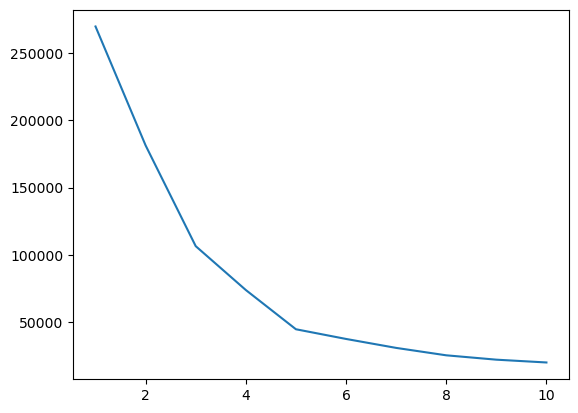

In [89]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [90]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,5,0
1,2,Male,21,15,81,5,4
2,3,Female,20,16,6,5,0
3,4,Female,23,16,77,5,4
4,5,Female,31,17,40,5,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,5
196,197,Female,45,126,28,4,2
197,198,Male,32,126,74,4,5
198,199,Male,32,137,18,4,2


In [91]:
 df.to_csv('Customer segmentation')